In [99]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

# NY Times Data
us_counties = "covid_data/us-counties.csv"
us_states = "covid_data/us-states.csv"
us_total = "covid_data/us.csv"
counties = pd.read_csv(us_counties)
states = pd.read_csv(us_states)
us = pd.read_csv(us_total)

In [100]:
counties.head(10)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0
5,2020-01-25,Orange,California,6059.0,1,0
6,2020-01-25,Cook,Illinois,17031.0,1,0
7,2020-01-25,Snohomish,Washington,53061.0,1,0
8,2020-01-26,Maricopa,Arizona,4013.0,1,0
9,2020-01-26,Los Angeles,California,6037.0,1,0


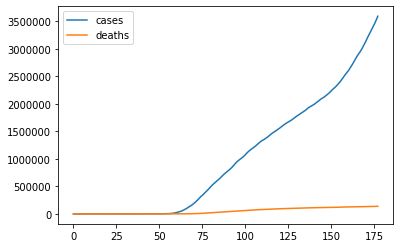

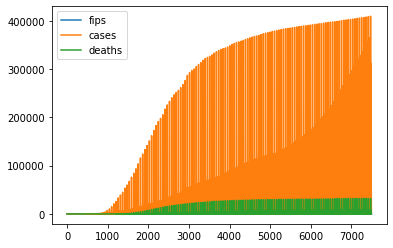

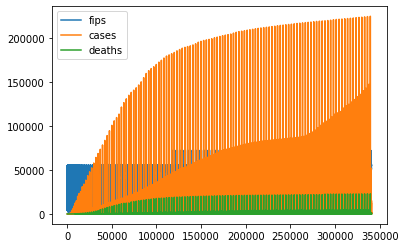

In [101]:
us.plot();
states.plot();
counties.plot();

In [102]:
trump_data = "approval_ratings/trump_ratings.csv"
trump_ratings = pd.read_csv(trump_data)
trump_ratings.head(120)

,president,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,...,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
0,Donald Trump,All polls,7/17/2020,1/20/2017,1/22/2017,Morning Consult,B/C,1992.0,rv,0.680029,...,37.0,45.136218,37.901041,NaN,NaN,http://static.politico.com/9b/13/82a3baf542ae9...,49249,77261,1/23/2017,7/17/2020 9:53
1,Donald Trump,All polls,7/17/2020,1/20/2017,1/22/2017,Gallup,B,1500.0,a,0.262323,...,45.0,45.761409,43.566085,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49253,77265,1/23/2017,7/17/2020 9:53
2,Donald Trump,All polls,7/17/2020,1/20/2017,1/24/2017,Ipsos,B-,1632.0,a,0.153481,...,45.2,43.122312,43.865379,NaN,T,http://polling.reuters.com/#poll/CP3_2/,49426,77599,3/1/2017,7/17/2020 9:53
3,Donald Trump,All polls,7/17/2020,1/21/2017,1/23/2017,Gallup,B,1500.0,a,0.242845,...,46.0,45.761409,44.566085,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49262,77274,1/24/2017,7/17/2020 9:53
4,Donald Trump,All polls,7/17/2020,1/20/2017,1/25/2017,Quinnipiac University,B+,1190.0,rv,1.514172,...,44.0,37.646971,42.745973,NaN,NaN,https://poll.qu.edu/national/release-detail?Re...,49260,77272,1/26/2017,7/17/2020 9:53
5,Donald Trump,All polls,7/17/2020,1/22/2017,1/24/2017,Gallup,B,1500.0,a,0.227380,...,45.0,46.761409,43.566085,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49236,77248,1/25/2017,7/17/2020 9:53
6,Donald Trump,All polls,7/17/2020,1/21/2017,1/25/2017,Ipsos,B-,1651.0,a,0.141531,...,45.8,43.322312,44.465379,NaN,T,http://polling.reuters.com/#poll/CP3_2/,49425,77598,3/1/2017,7/17/2020 9:53
7,Donald Trump,All polls,7/17/2020,1/22/2017,1/24/2017,Rasmussen Reports/Pulse Opinion Research,C+,1500.0,lv,0.200411,...,43.0,51.591958,44.355536,NaN,T,http://www.rasmussenreports.com/public_content...,49266,77278,1/25/2017,7/17/2020 9:53
8,Donald Trump,All polls,7/17/2020,1/22/2017,1/26/2017,Ipsos,B-,1678.0,a,0.132882,...,46.4,43.622312,45.065379,NaN,T,http://polling.reuters.com/#poll/CP3_2/,49424,77597,3/1/2017,7/17/2020 9:53
9,Donald Trump,All polls,7/17/2020,1/23/2017,1/25/2017,Gallup,B,1500.0,a,0.214877,...,45.0,46.761409,43.566085,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49245,77257,1/26/2017,7/17/2020 9:53


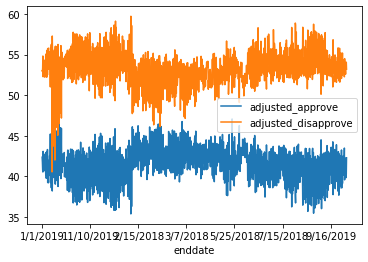

In [103]:
avg_trump_ratings =trump_ratings.groupby('enddate').agg({'adjusted_approve': 'mean', 'adjusted_disapprove': 'mean'})
avg_trump_ratings.plot();

In [104]:
# John's Hopkins Data
jh_data = "covid_data/time_series_covid19_deaths_US.csv"
jh_covid = pd.read_csv(jh_data)
jh_covid.drop(columns=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Lat', 'Long_', 'Combined_Key', 'Population', 'Country_Region'], inplace=True)
jh_covid.head(10)

,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20
0,American Samoa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Guam,0,0,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,5,5
2,Northern Mariana Islands,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
3,Puerto Rico,0,0,0,0,0,0,0,0,0,...,159,159,159,167,167,167,169,171,172,177
4,Virgin Islands,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
5,Alabama,0,0,0,0,0,0,0,0,0,...,12,13,14,14,15,15,17,18,19,20
6,Alabama,0,0,0,0,0,0,0,0,0,...,9,10,11,11,11,11,11,12,13,13
7,Alabama,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,3,3,3,3
8,Alabama,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,2,2,2,2
9,Alabama,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [105]:
jh_pivot = pd.pivot_table(jh_covid, index=['Province_State'], aggfunc=np.sum, fill_value=0)
jh_pivot.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/16/20,7/17/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,1230,1265,985,1006,1007,1007,1007,1033,1058,1068
Alaska,0,0,0,0,0,0,0,0,0,0,...,17,17,14,15,16,16,16,17,17,17
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,0,0,0,0,0,0,...,2492,2583,1764,1798,1817,1825,1829,1927,1963,2038
Arkansas,0,0,0,0,0,0,0,0,0,0,...,341,353,279,281,286,287,292,301,305,309
California,0,0,0,0,0,0,0,0,0,0,...,7489,7603,6265,6315,6334,6373,6441,6573,6718,6859
Colorado,0,0,0,0,0,0,0,0,0,0,...,1745,1751,1701,1701,1701,1701,1691,1696,1704,1706
Connecticut,0,0,0,0,0,0,0,0,0,0,...,4389,4396,4326,4335,4335,4335,4338,4338,4343,4348
Delaware,0,0,0,0,0,0,0,0,0,0,...,521,521,510,512,512,512,512,514,515,517


In [106]:
congressional_ballot = "approval_ratings/generic_polllist.csv"
general_ballot = pd.read_csv(congressional_ballot)

# I made a new column called 'change' that calculates the difference is percent of generic ballot by taking the difference between the dem and rep totals. This will be graphed below.
general_ballot['gap'] = (general_ballot['adjusted_dem']-general_ballot['adjusted_rep'])
general_ballot.head(10)

,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,influence,...,adjusted_dem,adjusted_rep,multiversions,tracking,url,poll_id,question_id,createddate,timestamp,gap
0,All polls,7/17/2020,11/30/2018,12/2/2018,Winston Group,B/C,1000,rv,0.753612,0.0,...,46.821674,41.274141,NaN,NaN,https://www.winningtheissues.org/wp-content/up...,66565,124055,5/29/2020,18:00:11 17 Jul 2020,5.547533
1,All polls,7/17/2020,12/29/2018,12/30/2018,Winston Group,B/C,1000,rv,0.611841,0.0,...,47.821674,41.274141,NaN,NaN,https://www.winningtheissues.org/wp-content/up...,66581,124115,5/29/2020,18:00:11 17 Jul 2020,6.547533
2,All polls,7/17/2020,12/31/2018,1/2/2019,HarrisX,C,3012,rv,0.032487,0.0,...,49.910864,39.819588,NaN,T,https://scottrasmussen.com/generic-ballot-daily/,57208,92471,1/3/2019,18:00:11 17 Jul 2020,10.091276
3,All polls,7/17/2020,1/1/2019,1/3/2019,HarrisX,C,3012,rv,0.031667,0.0,...,48.910864,39.819588,NaN,T,https://scottrasmussen.com/generic-ballot-daily/,57218,92479,1/4/2019,18:00:11 17 Jul 2020,9.091276
4,All polls,7/17/2020,1/2/2019,1/4/2019,HarrisX,C,3003,rv,0.030810,0.0,...,47.910864,40.819588,NaN,T,https://scottrasmussen.com/generic-ballot-daily/,57221,92483,1/5/2019,18:00:11 17 Jul 2020,7.091276
5,All polls,7/17/2020,1/3/2019,1/5/2019,HarrisX,C,3000,rv,0.030072,0.0,...,47.910864,41.819588,NaN,T,https://scottrasmussen.com/toplines-congressio...,57229,92497,1/7/2019,18:00:11 17 Jul 2020,6.091276
6,All polls,7/17/2020,1/4/2019,1/6/2019,HarrisX,C,3000,rv,0.029384,0.0,...,47.910864,40.819588,NaN,T,https://scottrasmussen.com/toplines-congressio...,57230,92498,1/7/2019,18:00:11 17 Jul 2020,7.091276
7,All polls,7/17/2020,1/5/2019,1/7/2019,HarrisX,C,3005,rv,0.028795,0.0,...,47.910864,40.819588,NaN,T,https://scottrasmussen.com/generic-ballot-daily/,57231,92504,1/8/2019,18:00:11 17 Jul 2020,7.091276
8,All polls,7/17/2020,1/6/2019,1/8/2019,HarrisX,C,3004,rv,0.028188,0.0,...,47.910864,39.819588,NaN,T,https://scottrasmussen.com/generic-ballot-daily/,57245,92595,1/9/2019,18:00:11 17 Jul 2020,8.091276
9,All polls,7/17/2020,1/4/2019,1/11/2019,HarrisX,C,7020,rv,0.096843,0.0,...,48.910864,40.819588,NaN,T,https://scottrasmussen.com/weekly-generic-ballot/,57295,92646,1/12/2019,18:00:11 17 Jul 2020,8.091276


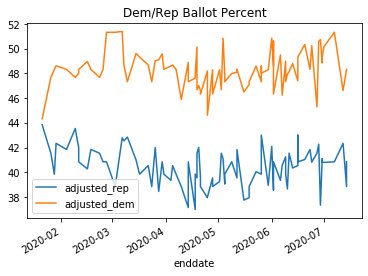

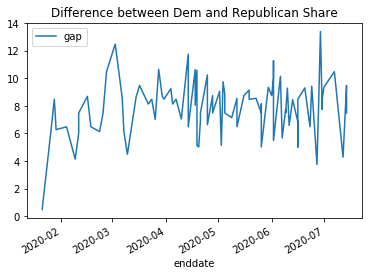

In [107]:
# Change dataframe dates to pandas datetime

general_ballot['enddate'] = pd.to_datetime(general_ballot['enddate'])

generic_ballot_2020 = general_ballot.loc[general_ballot['enddate'] > '2020-1-20']

#This groups the survey data by enddate and takes the mean if there are multiple survey enddates on the same day

generic_ballot_2020.groupby('enddate').aggregate({'adjusted_dem': 'mean', 'adjusted_rep': 'mean'})
generic_ballot_2020.plot(x='enddate', y=['adjusted_rep', 'adjusted_dem'], title= 'Dem/Rep Ballot Percent');

# Charting Difference Between Dem/Rep Generic Ballot Since Start of Covid
generic_ballot_2020.plot(x='enddate', y='gap', title='Difference between Dem and Republican Share')




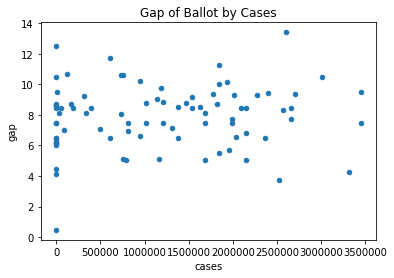

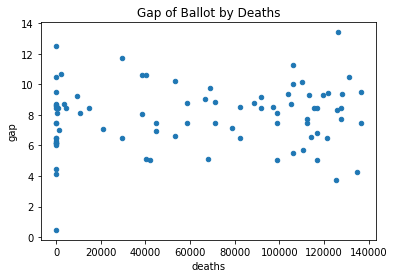

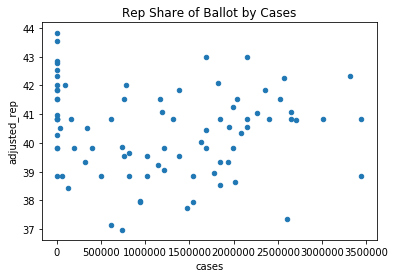

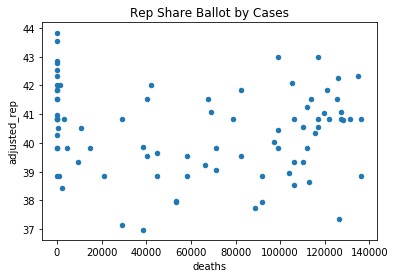

In [121]:
# Scatter Plot of Deaths vs General Ballot
# First create one dataframe to get 
gen_ballot = generic_ballot_2020.rename(columns={'enddate': 'date'})
us['date'] = pd.to_datetime(us['date'])




ballot_covid_deaths = us.merge(gen_ballot, on=['date'])
ballot_covid_deaths.drop(columns=['url', 'population', 'multiversions', 'tracking', 'poll_id', 'question_id', 'timestamp', 'createddate'], inplace=True)

ballot_covid_deaths.plot(kind='scatter', x='cases', y='gap', title='Gap of Ballot by Cases');
ballot_covid_deaths.plot(kind='scatter', x='deaths', y='gap', title='Gap of Ballot by Deaths');
ballot_covid_deaths.plot(kind='scatter', x='cases', y='adjusted_rep', title='Rep Share of Ballot by Cases');
ballot_covid_deaths.plot(kind='scatter', x='deaths', y='adjusted_rep', title='Rep Share Ballot by Cases');

The r-squared is: 0.042570998896171074


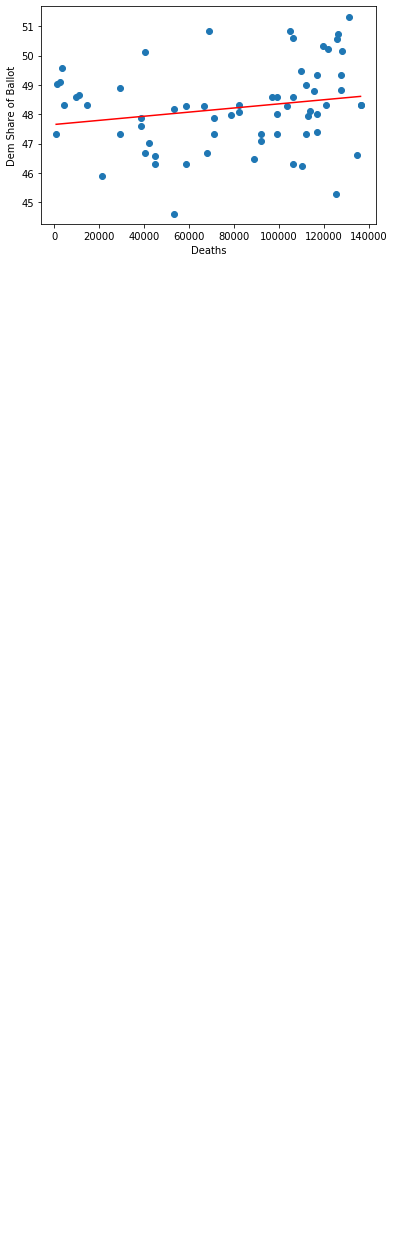

The r-squared is: 0.058524551615108195


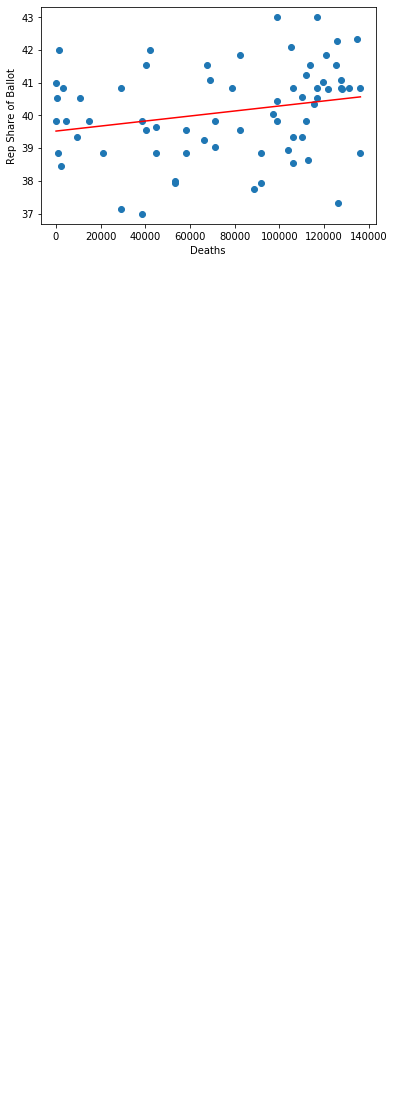

In [117]:
x_values = ballot_covid_deaths.loc[ballot_covid_deaths['deaths']>500]['deaths']
y_values = ballot_covid_deaths.loc[ballot_covid_deaths['deaths']>500]['adjusted_dem']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Deaths')
plt.ylabel('Dem Share of Ballot')
print(f"The r-squared is: {rvalue**2}")
plt.show()

x_values = ballot_covid_deaths.loc[ballot_covid_deaths['deaths']>50]['deaths']
y_values = ballot_covid_deaths.loc[ballot_covid_deaths['deaths']>50]['adjusted_rep']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Deaths')
plt.ylabel('Rep Share of Ballot')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.03706575013477562


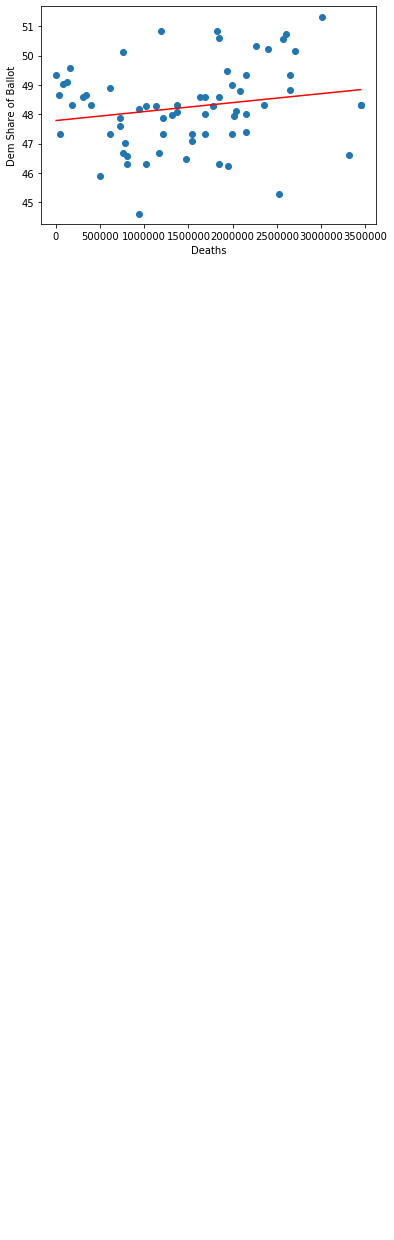

The r-squared is: 0.07734228096464713


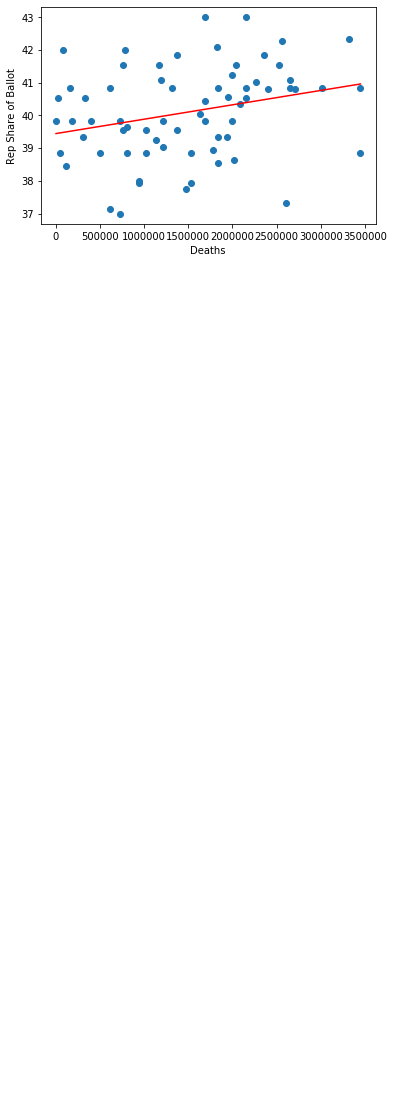

In [119]:
x_values = ballot_covid_deaths.loc[ballot_covid_deaths['cases']>5000]['cases']
y_values = ballot_covid_deaths.loc[ballot_covid_deaths['cases']>5000]['adjusted_dem']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Deaths')
plt.ylabel('Dem Share of Ballot')
print(f"The r-squared is: {rvalue**2}")
plt.show()

x_values = ballot_covid_deaths.loc[ballot_covid_deaths['cases']>5000]['cases']
y_values = ballot_covid_deaths.loc[ballot_covid_deaths['cases']>5000]['adjusted_rep']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Deaths')
plt.ylabel('Rep Share of Ballot')
print(f"The r-squared is: {rvalue**2}")
plt.show()